In [ ]:
https://realpython.com/logistic-regression-python/

<h1>Logistic Regression is a classification technique, used in supervised machine learning</h1>
<p>&nbsp;</p>
<ol style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">
<li style="box-sizing: border-box; margin-bottom: 0.28125rem;"><span style="box-sizing: border-box; font-weight: bolder;">Independent variables</span>, also called inputs or predictors, don&rsquo;t depend on other features of interest (or at least you assume so for the purpose of the analysis).</li>
<li style="box-sizing: border-box; margin-bottom: 0.28125rem;"><span style="box-sizing: border-box; font-weight: bolder;">Dependent variables</span>, also called outputs or responses, depend on the independent variables.</li>
</ol>
<p>&nbsp;</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">There are two main types of classification problems:</p>
<ol style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">
<li style="box-sizing: border-box; margin-bottom: 0.28125rem;"><span style="box-sizing: border-box; font-weight: bolder;">Binary</span>&nbsp;or&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">binomial classification:</span>&nbsp;exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)</li>
<li style="box-sizing: border-box; margin-bottom: 0.28125rem;"><span style="box-sizing: border-box; font-weight: bolder;">Multiclass</span>&nbsp;or&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">multinomial classification:</span>&nbsp;three or more classes of the outputs to choose from</li>
</ol>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>Logistic Regression typically looks like a sigmoid function (s-shaped curve), where the sigmoid function has values very close to either 0 or 1, which makes it suitable for classification.</p>
<p>&nbsp;</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">Your goal is to find the&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">logistic regression function</span>&nbsp;𝑝(𝐱) such that the&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">predicted responses</span>&nbsp;𝑝(𝐱ᵢ) are as close as possible to the&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">actual response</span>&nbsp;𝑦ᵢ for each observation 𝑖 = 1, &hellip;, 𝑛. Remember that the actual response can be only 0 or 1 in binary classification problems! This means that each 𝑝(𝐱ᵢ) should be close to either 0 or 1. That&rsquo;s why it&rsquo;s convenient to use the sigmoid function.</p>
<p><span style="color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">Once you have the logistic regression function 𝑝(𝐱), you can use it to predict the outputs for new and unseen inputs, assuming that the underlying mathematical dependence is unchanged.</span></p>
<p>&nbsp;</p>

In [12]:
import numpy as np
print(np.log(.0001))
print(np.log(1))

-9.210340371976184
0.0


<h3 id="methodology" style="box-sizing: border-box; margin-top: 2.25rem; margin-bottom: 0.5625rem; font-weight: 500; line-height: 1.2; font-size: 1.72266rem; white-space: pretty; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; background-color: #ffffff;">Methodology</h3>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">Logistic regression is a linear classifier, so you&rsquo;ll use a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, also called the&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">logit</span>. The variables 𝑏₀, 𝑏₁, &hellip;, 𝑏ᵣ are the&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">estimators</span>&nbsp;of the regression coefficients, which are also called the&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">predicted weights</span>&nbsp;or just&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">coefficients</span>.</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">&nbsp;</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">The logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(&minus;𝑓(𝐱)). As such, it&rsquo;s often close to either 0 or 1. The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 &minus; 𝑝(𝑥) is the probability that the output is 0.</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">&nbsp;</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">Logistic regression determines the best predicted weights 𝑏₀, 𝑏₁, &hellip;, 𝑏ᵣ such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦ᵢ, 𝑖 = 1, &hellip;, 𝑛, where 𝑛 is the number of observations. The process of calculating the best weights using available observations is called&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">model training</span>&nbsp;or&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">fitting</span>.</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">&nbsp;</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">To get the best weights, you usually maximize the&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">log-likelihood function (LLF)</span>&nbsp;for all observations 𝑖 = 1, &hellip;, 𝑛. This method is called the&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">maximum likelihood estimation</span>&nbsp;and is represented by the equation LLF = &Sigma;ᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 &minus; 𝑦ᵢ) log(1 &minus; 𝑝(𝐱ᵢ))).</p>

<p>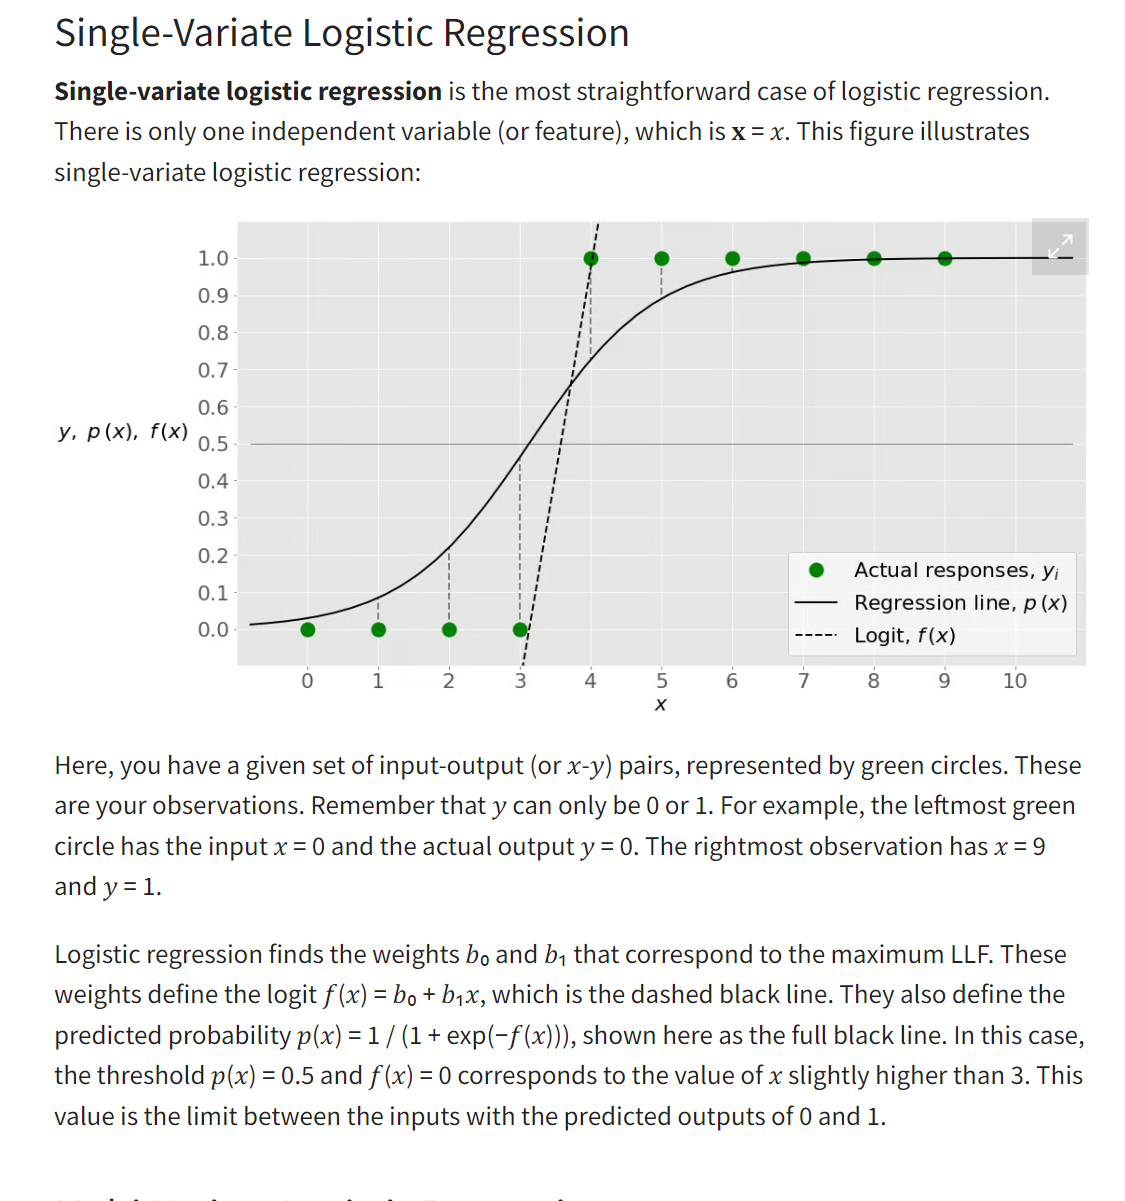</p>

<h3 id="regularization" style="box-sizing: border-box; margin-top: 2.25rem; margin-bottom: 0.5625rem; font-weight: 500; line-height: 1.2; font-size: 1.72266rem; white-space: pretty; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; background-color: #ffffff;">Regularization</h3>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;"><a style="box-sizing: border-box; color: #619ccd; text-decoration-line: none; background-color: transparent;" href="https://realpython.com/linear-regression-in-python/#underfitting-and-overfitting"><span style="box-sizing: border-box; font-weight: bolder;">Overfitting</span></a>&nbsp;is one of the most serious kinds of problems related to machine learning. It occurs when a model learns the training data too well. The model then learns not only the relationships among data but also the noise in the dataset. Overfitted models tend to have good performance with the data used to fit them (the training data), but they behave poorly with unseen data (or test data, which is data not used to fit the model).</p>
<p style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">Overfitting usually occurs with complex models.&nbsp;<span style="box-sizing: border-box; font-weight: bolder;">Regularization</span>&nbsp;normally tries to reduce or penalize the complexity of the model. Regularization techniques applied with logistic regression mostly tend to penalize large coefficients 𝑏₀, 𝑏₁, &hellip;, 𝑏ᵣ:</p>
<ul style="box-sizing: border-box; margin-top: 0px; margin-bottom: 1.125rem; color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">
<li style="box-sizing: border-box; margin-bottom: 0.28125rem;"><span style="box-sizing: border-box; font-weight: bolder;">L1 regularization (LASSO)</span>&nbsp;penalizes the LLF with the scaled sum of the absolute values of the weights: |𝑏₀|+|𝑏₁|+⋯+|𝑏ᵣ|.</li>
<li style="box-sizing: border-box; margin-bottom: 0.28125rem;"><span style="box-sizing: border-box; font-weight: bolder;">L2 regularization</span> <strong>(Ridge)</strong> penalizes the LLF with the scaled sum of the squares of the weights: 𝑏₀&sup2;+𝑏₁&sup2;+⋯+𝑏ᵣ&sup2;.</li>
<li style="box-sizing: border-box; margin-bottom: 0.28125rem;"><span style="box-sizing: border-box; font-weight: bolder;">Elastic-net regularization</span>&nbsp;is a linear combination of L1 and L2 regularization</li>
</ul>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
#create data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [15]:
#create model and train it
model = LogisticRegression(solver='liblinear', random_state=0)

In [16]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [17]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [18]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)


In [19]:
model.classes_

array([0, 1])

In [20]:
#Step 4: Evaluate the Model
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

<p><span style="color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).</span></p>
<p>&nbsp;</p>
<p><span style="color: #222222; font-family: 'source sans pro', -apple-system, BlinkMacSystemFont, 'segoe ui', Roboto, 'helvetica neue', Arial, sans-serif, 'apple color emoji', 'segoe ui emoji', 'segoe ui symbol'; font-size: 18px; background-color: #ffffff;">You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with&nbsp;</span><code style="box-sizing: border-box; font-family: SFMono-Regular, Menlo, Monaco, Consolas, 'liberation mono', 'courier new', monospace; font-size: 14.85px; color: #222222; overflow-wrap: break-word; white-space-collapse: preserve; background-color: #ffffff;">.predict()</code></p>

In [21]:
#the threshold is .5, if p is greater than .5, 1, otherwise, 0
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [22]:
#since 9/10 were correct, score is 90%
model.score(x,y)

0.9

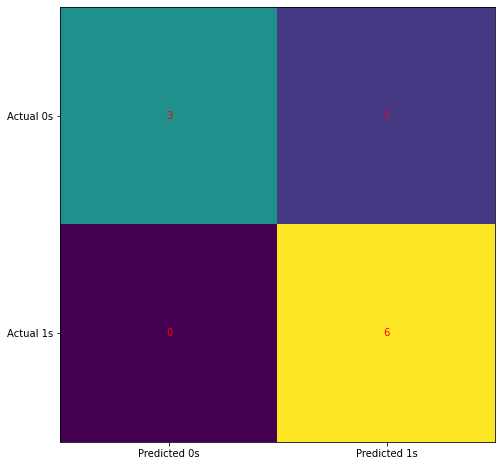

In [23]:
#confusion matrix
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [25]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [27]:
### Improve Model
#For example, let’s work with the regularization strength C equal to 10.0, instead of the default value of 1.0:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [28]:
model.intercept_

array([-3.51335372])

In [29]:
model.coef_

array([[1.12066084]])

In [30]:
#higher values of C(regularization strength) will cause weaker penalization of high values of beta (pushing the 4th observation p value less than .5)
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [31]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [32]:
model.score(x, y)

1.0

In [33]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

In [34]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

